# Southern Ocean chosen density bins and contours

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cftime
import glob
import dask
import os
import datetime
import matplotlib.colors as col
import dask.array as dsa
from cosima_cookbook import distributed as ccd
import cartopy.crs as ccrs
import cmocean as cm
from scipy.ndimage.filters import uniform_filter1d
import matplotlib as mpl


import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/35105/status,
Dashboard: /proxy/35105/status,Workers: 4
Total threads: 16,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41149,Workers: 4
Dashboard: /proxy/35105/status,Total threads: 16
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:38797,Total threads: 4
Dashboard: /proxy/38677/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:44347,


In [3]:
EKE = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/EKE_10yr.nc').EKE
MKE = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/MKE_10yr.nc').MKE
Reynolds = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/Reynolds_10yr_fulldepth.nc').Reynolds
Form_stress = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/Form_stress_10yr_fulldepth.nc').Form_stress
h_bar = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/h_bar_10yr.nc').h_bar

In [4]:
cmdict = cm.tools.get_dict(cm.cm.gray, N=19)
### get a discrete number of colours from an cmocean colormap

plot SSH contours

Text(0, 0.5, 'sea surface height (m)')

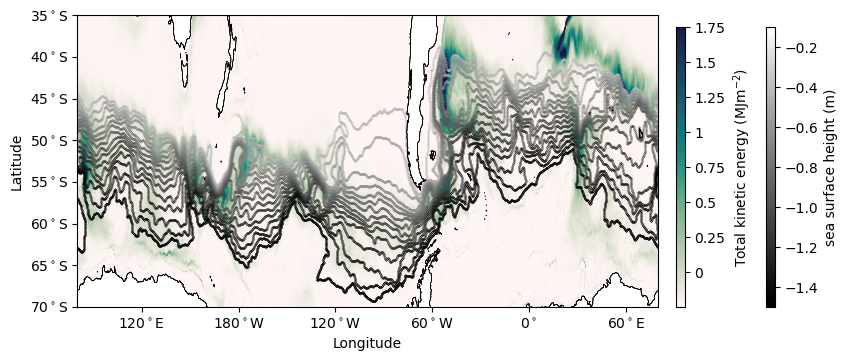

In [5]:
fig = plt.figure(figsize = (9,4))

p1 = ((MKE+EKE)/1e6).sum('isopycnal_bins').where(((MKE+EKE)/1e6).sum('isopycnal_bins') !=0).plot( vmax = 0.2, cmap = 'cmo.tempo', add_colorbar = False)
A = 'SO_ocean_contour_smoothed_u_t_-0.1m_SSH_plt_approach.npz'
B = 'SO_ocean_contour_smoothed_u_t_-0.2m_SSH_plt_approach.npz'
C = 'SO_ocean_contour_smoothed_u_t_-0.3m_SSH_plt_approach.npz'
D = 'SO_ocean_contour_smoothed_u_t_-0.4m_SSH_plt_approach.npz'
E = 'SO_ocean_contour_smoothed_u_t_-0.5m_SSH_plt_approach.npz'
F = 'SO_ocean_contour_smoothed_u_t_-0.6m_SSH_plt_approach.npz'
G = 'SO_ocean_contour_smoothed_u_t_-0.7m_SSH_plt_approach.npz'
H = 'SO_ocean_contour_smoothed_u_t_-0.8m_SSH_plt_approach.npz'
I = 'SO_ocean_contour_smoothed_u_t_-0.9m_SSH_plt_approach.npz'
J = 'SO_ocean_contour_smoothed_u_t_-1.0m_SSH_plt_approach.npz'
K = 'SO_ocean_contour_smoothed_u_t_-1.1m_SSH_plt_approach.npz'
L = 'SO_ocean_contour_smoothed_u_t_-1.2m_SSH_plt_approach.npz'
M = 'SO_ocean_contour_smoothed_u_t_-1.3m_SSH_plt_approach.npz'
N = 'SO_ocean_contour_smoothed_u_t_-1.4m_SSH_plt_approach.npz'

mask = (((MKE+EKE)/1e6).sum('isopycnal_bins').where(((MKE+EKE)/1e6).sum('isopycnal_bins') !=0)*0+1).fillna(0)
mask.plot.contour(colors = 'k', linewidths = 0.3)


for j in np.arange(14):
    i = [A,B,C,D,E,F,G,H,I,J,K,L,M,N][j]
    SSH = [-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,-1.4][j]
    outfile = '/g/data/x77/cy8964/Post_Process/'+i
    data = np.load(outfile)
    lon_along_contour=data['lon_along_contour_t']
    lat_along_contour=data['lat_along_contour_t']
    plt.scatter(lon_along_contour,lat_along_contour,label = str(SSH),s = 0.02, color = (cmdict['red'][j+4][1],cmdict['green'][j+4][1],cmdict['blue'][j+4][1]))

j=14
SSH = -1.5
lat_along_contour = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SO_O_latlon_shiftedback.nc').lat_along_contour
lon_along_contour = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SO_O_latlon_shiftedback.nc').lon_along_contour

plt.scatter(lon_along_contour,lat_along_contour,label = str(SSH),s = 0.02, color = (cmdict['red'][j+4][1],cmdict['green'][j+4][1],cmdict['blue'][j+4][1]))
j = 11

X = np.arange(-240,100,60)
plt.xticks(X, ('120$^\circ$E','180$^\circ$W','120$^\circ$W','60$^\circ$W','0$^\circ$','60$^\circ$E'));
Y = np.arange(-70,-34,5)
plt.yticks(Y, ('70$^\circ$S','65$^\circ$S','60$^\circ$S','55$^\circ$S','50$^\circ$S','45$^\circ$S','40$^\circ$S','35$^\circ$S'));
plt.ylabel('Latitude')
plt.xlabel('Longitude')

fig.subplots_adjust(right = 0.77, bottom = 0.15)
#plt.legend(bbox_to_anchor=(1.05, 0.9),loc='upper left')
cbar_ax = fig.add_axes([0.79, 0.15, 0.01, 0.7])
plt.colorbar(p1, cax=cbar_ax)
cbar_ax.set_ylabel('Total kinetic energy (MJm$^{-2}$)')
Y = np.arange(0,2.1,1)
cbar_ax.set_yticklabels(('0','0.25','0.5','0.75','1','1.25','1.5','1.75','2'));


ax3 = fig.add_axes([0.7, 0.15, 0.01, 0.7])
img = ax3.imshow(np.array([np.arange(-1.5,0,0.1)]) , cmap=cm.cm.gray)
ax3.set_visible(False)

cbar_ax2 = fig.add_axes([0.89, 0.15, 0.01, 0.7])
plt.colorbar(img, cax=cbar_ax2)
cbar_ax2.set_ylabel('sea surface height (m)')

#plt.savefig('contours.png',dpi = 400)

# Plots for honours talk

In [7]:
plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 20})


In [8]:
session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt = '01deg_jra55v13_ryf9091'
lat_range = slice(-70,-34.99)
ht = cc.querying.getvar(expt,'ht', session,n=1)
ht = ht.sel(yt_ocean = lat_range)

In [16]:
# Setting start and end times
start_time = '2170-01-01'
end_time = '2170-12-31'
# Load velocity fields
v01 = cc.querying.getvar(expt, 'v', session, ncfile='%daily%', start_time = start_time,end_time=end_time)
v01 = v01.sel(time = '2170-01-01', method = 'nearest')
u01 = cc.querying.getvar(expt, 'u', session, ncfile='%daily%', start_time = start_time,end_time=end_time)
u01 = u01.sel(time = '2170-01-01', method = 'nearest')
speed01 = np.sqrt(v01**2+u01**2).sel(yu_ocean = lat_range)


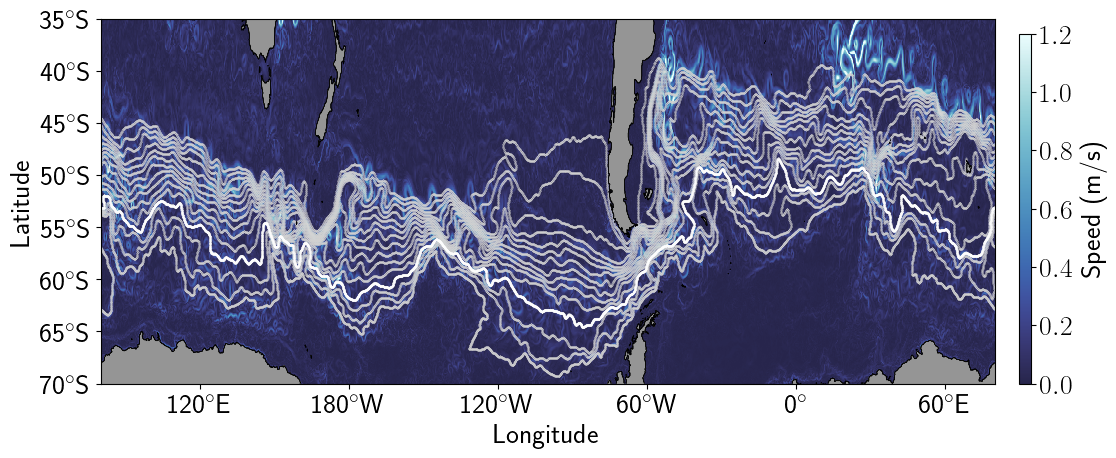

In [29]:
fig = plt.figure(figsize = (12,5))
# making a nice colormap
cmap = cm.cm.ice
newcmap = cm.tools.crop_by_percent(cmap, 15, which='min', N=None)
#p1 = ht.plot.contourf(levels = [1000,2000,3000,4000], cmap = 'Blues', alpha = 0.7, add_colorbar = False)
p1=speed01.fillna(0).sel(st_ocean = 50, method = 'nearest').isel(time = 0).plot.pcolormesh(x='xu_ocean', y='yu_ocean', add_colorbar=False,vmin=0,vmax=1.2,cmap=newcmap)

plt.title('')
#p1 = ((MKE+EKE)/1e6).sum('isopycnal_bins').where(((MKE+EKE)/1e6).sum('isopycnal_bins') !=0).plot( vmax = 0.2, cmap = 'cmo.tempo', add_colorbar = False)
A = 'SO_ocean_contour_smoothed_u_t_-0.1m_SSH_plt_approach.npz'
B = 'SO_ocean_contour_smoothed_u_t_-0.2m_SSH_plt_approach.npz'
C = 'SO_ocean_contour_smoothed_u_t_-0.3m_SSH_plt_approach.npz'
D = 'SO_ocean_contour_smoothed_u_t_-0.4m_SSH_plt_approach.npz'
E = 'SO_ocean_contour_smoothed_u_t_-0.5m_SSH_plt_approach.npz'
F = 'SO_ocean_contour_smoothed_u_t_-0.6m_SSH_plt_approach.npz'
G = 'SO_ocean_contour_smoothed_u_t_-0.7m_SSH_plt_approach.npz'
H = 'SO_ocean_contour_smoothed_u_t_-0.8m_SSH_plt_approach.npz'
I = 'SO_ocean_contour_smoothed_u_t_-0.9m_SSH_plt_approach.npz'
J = 'SO_ocean_contour_smoothed_u_t_-1.0m_SSH_plt_approach.npz'
K = 'SO_ocean_contour_smoothed_u_t_-1.1m_SSH_plt_approach.npz'
L = 'SO_ocean_contour_smoothed_u_t_-1.2m_SSH_plt_approach.npz'
M = 'SO_ocean_contour_smoothed_u_t_-1.3m_SSH_plt_approach.npz'
N = 'SO_ocean_contour_smoothed_u_t_-1.4m_SSH_plt_approach.npz'

mask = (((MKE+EKE)/1e6).sum('isopycnal_bins').where(((MKE+EKE)/1e6).sum('isopycnal_bins') !=0)*0+1).fillna(0)
mask.plot.contour(colors = 'k', linewidths = 0.3)
mask = (((MKE+EKE)/1e6).sum('isopycnal_bins').where(((MKE+EKE)/1e6).sum('isopycnal_bins') ==0)*0+1)
mask.plot.contourf(cmap = 'Greys', add_colorbar = False)




for j in np.arange(14):
    i = [A,B,C,D,E,F,G,H,I,J,K,L,M,N][j]
    SSH = [-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,-1.4][j]
    outfile = '/g/data/x77/cy8964/Post_Process/'+i
    data = np.load(outfile)
    lon_along_contour=data['lon_along_contour_t']
    lat_along_contour=data['lat_along_contour_t']
    plt.scatter(lon_along_contour,lat_along_contour,label = str(SSH),s = 0.05, color = 'lightgray')

j=14
SSH = -1.5
lat_along_contour = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SO_O_latlon_shiftedback.nc').lat_along_contour
lon_along_contour = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SO_O_latlon_shiftedback.nc').lon_along_contour
plt.scatter(lon_along_contour,lat_along_contour,label = str(SSH),s = 0.05, color = 'lightgray')

j = 11
SSH = -1.2
lat_along_contour = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SO_L_latlon.nc').lat_along_contour
lon_along_contour = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SO_L_latlon.nc').lon_along_contour
plt.scatter(lon_along_contour,lat_along_contour,label = str(SSH),s = 0.1, color = 'w')

X = np.arange(-240,100,60)
plt.xticks(X, ('120$^\circ$E','180$^\circ$W','120$^\circ$W','60$^\circ$W','0$^\circ$','60$^\circ$E'));
Y = np.arange(-70,-34,5)
plt.yticks(Y, ('70$^\circ$S','65$^\circ$S','60$^\circ$S','55$^\circ$S','50$^\circ$S','45$^\circ$S','40$^\circ$S','35$^\circ$S'));
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.xlim(-280,80)

fig.subplots_adjust(right = 0.87, bottom = 0.15)
#plt.legend(bbox_to_anchor=(1.05, 0.9),loc='upper left')
# cbar_ax = fig.add_axes([0.89, 0.15, 0.01, 0.7])
# #cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
# plt.colorbar(p1, cax=cbar_ax)
# cbar_ax.set_ylabel('Depth (m)')

ax_cb = plt.axes([0.89, 0.15, 0.01, 0.7])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('Speed (m/s)');

#ax3 = fig.add_axes([0.7, 0.15, 0.01, 0.7])
#img = ax3.imshow(np.array([np.arange(-1.5,0,0.1)]) , cmap=cm.cm.gray)
#ax3.set_visible(False)

#cbar_ax2 = fig.add_axes([0.89, 0.15, 0.01, 0.7])
#plt.colorbar(img, cax=cbar_ax2)
#cbar_ax2.set_ylabel('sea surface height (m)')

plt.savefig('contours.png',dpi = 600)

# Plot isopycnal depths

Load isopycnal depths

In [5]:
isopycnal_depth = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/h_bar_10yr.nc').h_bar
isopycnal_depth = isopycnal_depth.where(isopycnal_depth !=0).cumsum('isopycnal_bins')

In [6]:
plt.rc('text', usetex=False)
plt.rcParams.update({'font.size': 12})


Text(0, 0.5, 'st_ocean')

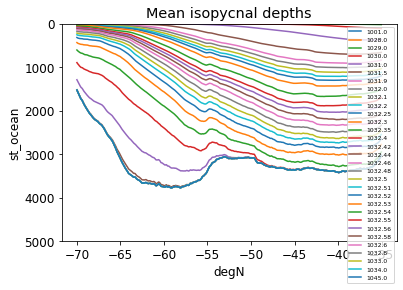

In [7]:
for i in isopycnal_depth.isopycnal_bins.values:
    isopycnal_depth.sel(isopycnal_bins=i, method = 'nearest').mean('xt_ocean').plot(label = i)
plt.legend(fontsize =6)
plt.ylim(5000,0)
plt.title('Mean isopycnal depths')
plt.xlabel('degN')
plt.ylabel('st_ocean')

In [8]:
cmdict = cm.tools.get_dict(cm.cm.dense, N=31)

In [9]:
pot_rho_1 = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SO_pot_rho_1_10_yr_mean.nc').pot_rho_1

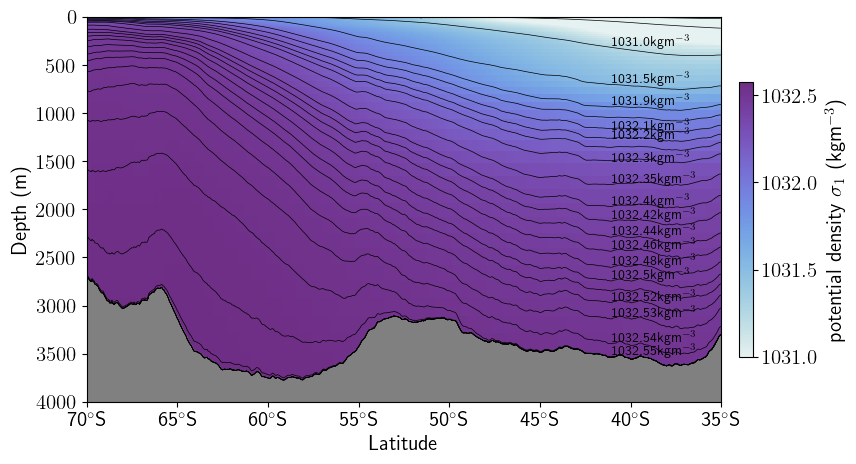

In [13]:
fig = plt.figure(figsize = (9,5))
isopycnal_depthnan = isopycnal_depth.where(isopycnal_depth!=0)
for i in range(len(isopycnal_depthnan.isopycnal_bins.values)):
    j = isopycnal_depthnan.isopycnal_bins.values[i]
    isopycnal_depthnan.sel(isopycnal_bins=j, method = 'nearest').mean('xt_ocean').plot(color = 'k', linewidth = 0.5)
#     plt.fill_between(isopycnal_depthnan.yt_ocean, isopycnal_depthnan.sel(isopycnal_bins=j, method = 'nearest').mean('xt_ocean'), 
#                      isopycnal_depthnan.sel(isopycnal_bins=j+1, method = 'nearest').mean('xt_ocean'),color = (cmdict['red'][i][1],cmdict['green'][i][1],cmdict['blue'][i][1]))
for j in np.array([1031.00  , 1031.50 , 1031.90 ,
       1032.35, 1032.40 ,
       1032.42, 1032.44, 1032.46, 1032.48, 1032.50 , 1032.52,
       1032.53, 1032.54,1032.55]):   
    plt.text(-41,isopycnal_depthnan.sel(isopycnal_bins=j, method = 'nearest').mean('xt_ocean').sel(yt_ocean = -41, method = 'nearest').values-20,str(j)+'kgm$^{-3}$', fontsize = 10)

for j in np.array([1032.10 , 1032.20 ,1032.30 ]):   
    plt.text(-41,isopycnal_depthnan.sel(isopycnal_bins=j, method = 'nearest').mean('xt_ocean').sel(yt_ocean = -41, method = 'nearest').values+10,str(j)+'kgm$^{-3}$', fontsize = 10)

newcmap = cm.tools.crop_by_percent(cm.cm.dense, 25, which='max', N= None)
p1 = pot_rho_1.where(pot_rho_1 !=0).sel(yt_ocean = slice(-70,-35)).mean('xt_ocean').plot(cmap = newcmap, yincrease = False, vmin = 1031, add_colorbar = False)

plt.fill_between(isopycnal_depthnan.yt_ocean, isopycnal_depthnan.sel(isopycnal_bins=j+1, method = 'nearest').mean('xt_ocean'),5000, color = 'grey')
plt.ylim(4000,0)
plt.xlim(-70,-35)
X = np.arange(-70,-34,5)
plt.xticks(X, ('70$^\circ$S','65$^\circ$S','60$^\circ$S','55$^\circ$S','50$^\circ$S','45$^\circ$S','40$^\circ$S','35$^\circ$S'));
plt.title('Zonal mean density ($\sigma_1$) layer thickness and depths')

plt.title('')
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')

fig.subplots_adjust(right = 0.83)
ax_cb = plt.axes([0.85, 0.2, 0.015, 0.55])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('potential density $\sigma_1$ (kgm$^{-3}$)');

fig.savefig('isopycnal_depths_highres.png',dpi = 400)


# Plot for paper

In [18]:
plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 14})


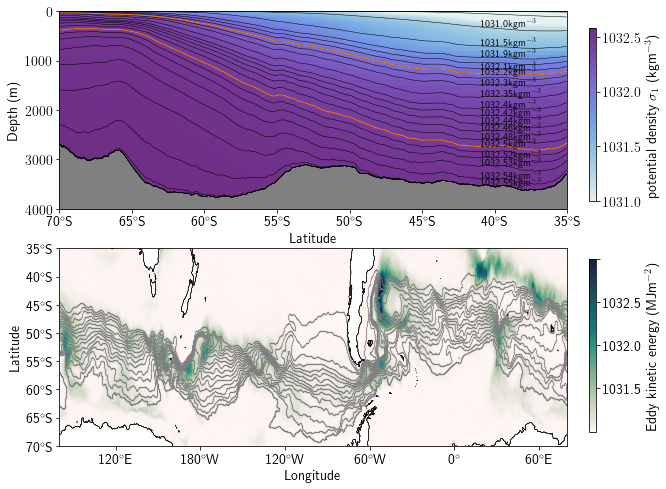

In [24]:
fig,axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,8))

p1 = ((EKE)/1e6).sum('isopycnal_bins').where(((EKE)/1e6).sum('isopycnal_bins') !=0).plot(ax = axes[1], vmax = 0.2, cmap = 'cmo.tempo', add_colorbar = False)
A = 'SO_ocean_contour_smoothed_u_t_-0.1m_SSH_plt_approach.npz'
B = 'SO_ocean_contour_smoothed_u_t_-0.2m_SSH_plt_approach.npz'
C = 'SO_ocean_contour_smoothed_u_t_-0.3m_SSH_plt_approach.npz'
D = 'SO_ocean_contour_smoothed_u_t_-0.4m_SSH_plt_approach.npz'
E = 'SO_ocean_contour_smoothed_u_t_-0.5m_SSH_plt_approach.npz'
F = 'SO_ocean_contour_smoothed_u_t_-0.6m_SSH_plt_approach.npz'
G = 'SO_ocean_contour_smoothed_u_t_-0.7m_SSH_plt_approach.npz'
H = 'SO_ocean_contour_smoothed_u_t_-0.8m_SSH_plt_approach.npz'
I = 'SO_ocean_contour_smoothed_u_t_-0.9m_SSH_plt_approach.npz'
J = 'SO_ocean_contour_smoothed_u_t_-1.0m_SSH_plt_approach.npz'
K = 'SO_ocean_contour_smoothed_u_t_-1.1m_SSH_plt_approach.npz'
L = 'SO_ocean_contour_smoothed_u_t_-1.2m_SSH_plt_approach.npz'
M = 'SO_ocean_contour_smoothed_u_t_-1.3m_SSH_plt_approach.npz'
N = 'SO_ocean_contour_smoothed_u_t_-1.4m_SSH_plt_approach.npz'

mask = (((EKE)/1e6).sum('isopycnal_bins').where(((EKE)/1e6).sum('isopycnal_bins') !=0)*0+1).fillna(0)
mask.plot.contour(colors = 'k', linewidths = 0.3)


for j in np.arange(14):
    i = [A,B,C,D,E,F,G,H,I,J,K,L,M,N][j]
    SSH = [-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,-1.4][j]
    outfile = '/g/data/x77/cy8964/Post_Process/'+i
    data = np.load(outfile)
    lon_along_contour=data['lon_along_contour_t']
    lat_along_contour=data['lat_along_contour_t']
    axes[1].scatter(lon_along_contour,lat_along_contour,label = str(SSH),s = 0.02, color = 'grey')

j=14
SSH = -1.5
lat_along_contour = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SO_O_latlon_shiftedback.nc').lat_along_contour
lon_along_contour = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SO_O_latlon_shiftedback.nc').lon_along_contour
axes[1].scatter(lon_along_contour,lat_along_contour,label = str(SSH),s = 0.02, color = 'grey')

X = np.arange(-240,100,60)
axes[1].set_xticks(X)
axes[1].set_xticklabels(('120$^\circ$E','180$^\circ$W','120$^\circ$W','60$^\circ$W','0$^\circ$','60$^\circ$E'));
Y = np.arange(-70,-34,5)
axes[1].set_yticks(Y)
axes[1].set_yticklabels(('70$^\circ$S','65$^\circ$S','60$^\circ$S','55$^\circ$S','50$^\circ$S','45$^\circ$S','40$^\circ$S','35$^\circ$S'));
axes[1].set_ylabel('Latitude')
axes[1].set_xlabel('Longitude')

#fig.subplots_adjust(right = 0.77, bottom = 0.15)
#plt.legend(bbox_to_anchor=(1.05, 0.9),loc='upper left')
cbar_ax = fig.add_axes([0.86, 0.15, 0.01, 0.3])
plt.colorbar(p1, cax=cbar_ax)
cbar_ax.set_ylabel('Eddy kinetic energy (MJm$^{-2}$)')
Y = np.arange(0,2.1,1)
cbar_ax.set_yticklabels(('0','0.25','0.5','0.75','1','1.25','1.5','1.75','2'));


## Isopycnal depths
isopycnal_depthnan = isopycnal_depth.where(isopycnal_depth!=0)
for i in range(len(isopycnal_depthnan.isopycnal_bins.values)):
    j = isopycnal_depthnan.isopycnal_bins.values[i]
    isopycnal_depthnan.sel(isopycnal_bins=j, method = 'nearest').mean('xt_ocean').plot(ax = axes[0],color = 'k', linewidth = 0.5)
    
for i in np.arange(2):
    j = np.array([1032.2,1032.5])[i]
    isopycnal_depthnan.sel(isopycnal_bins=j, method = 'nearest').mean('xt_ocean').plot(ax = axes[0],color = 'C1', linewidth = 1)

for j in np.array([1031.00  , 1031.50 , 1031.90 ,
       1032.35, 1032.40 ,
       1032.42, 1032.44, 1032.46, 1032.48, 1032.50 , 1032.52,
       1032.53, 1032.54,1032.55]):   
    axes[0].text(-41,isopycnal_depthnan.sel(isopycnal_bins=j, method = 'nearest').mean('xt_ocean').sel(yt_ocean = -41, method = 'nearest').values-20,str(j)+'kgm$^{-3}$', fontsize = 10)

for j in np.array([1032.10 , 1032.20 ,1032.30 ]):   
    axes[0].text(-41,isopycnal_depthnan.sel(isopycnal_bins=j, method = 'nearest').mean('xt_ocean').sel(yt_ocean = -41, method = 'nearest').values+10,str(j)+'kgm$^{-3}$', fontsize = 10)

newcmap = cm.tools.crop_by_percent(cm.cm.dense, 25, which='max', N= None)
p1 = pot_rho_1.where(pot_rho_1 !=0).sel(yt_ocean = slice(-70,-35)).mean('xt_ocean').plot(ax = axes[0],cmap = newcmap, yincrease = False, vmin = 1031, add_colorbar = False)

axes[0].fill_between(isopycnal_depthnan.yt_ocean, isopycnal_depthnan.sel(isopycnal_bins=j+1, method = 'nearest').mean('xt_ocean'),5000, color = 'grey')
axes[0].set_ylim(4000,0)
axes[0].set_xlim(-70,-35)
X = np.arange(-70,-34,5)
axes[0].set_xticks(X, ('70$^\circ$S','65$^\circ$S','60$^\circ$S','55$^\circ$S','50$^\circ$S','45$^\circ$S','40$^\circ$S','35$^\circ$S'));
axes[0].set_title('')#Zonal mean density ($\sigma_1$) layer thickness and depths')

axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Depth (m)')

ax_cb = plt.axes([0.86, 0.55, 0.01, 0.3])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('potential density $\sigma_1$ (kgm$^{-3}$)');
cbar_ax.set_yticklabels(('1031.0','1031.5','1032.0','1032.5'));

fig.subplots_adjust(right = 0.83)

fig.savefig('Fig2-density_layers_SSH_contours.png',dpi = 400)